In [1]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer, EsmForMaskedLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

/opt/anaconda3/envs/MachLearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
with open('/Users/johnhutchens/Desktop/Practicum/Data/ems_pbd_long_matrices.pickle',
           'rb') as f:
    esm_dict = pickle.load(f)

with open('/Users/johnhutchens/Desktop/Practicum/Data/pg_pbd_long_matrices.pickle',
           'rb') as f:
    pg_dict = pickle.load(f)

In [18]:
seq_esm_5 = esm_dict[5]['sequence']
seq_pg_5 = pg_dict[5]['sequence']

In [19]:
print(seq_esm_5)
print(seq_pg_5)

print(len(seq_esm_5))
print(len(seq_pg_5))

MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
166
166


In [20]:
lp_esm_matrix5 = esm_dict[5]['log_probs']

lp_pg_matrix5 = pg_dict[5]['log_probs']

print(lp_esm_matrix5.shape)
print(lp_pg_matrix5.shape)

torch.Size([166, 20])
torch.Size([166, 20])


In [24]:
lp_esm_matrix5[0]

tensor([-1.1008e+01, -1.4572e+01, -1.3094e+01, -1.3290e+01, -1.2588e+01,
        -1.2769e+01, -1.3610e+01, -1.2136e+01, -1.1682e+01, -1.1610e+01,
        -1.2588e-04, -1.2186e+01, -1.0877e+01, -1.2346e+01, -1.2470e+01,
        -1.1252e+01, -1.1108e+01, -1.1299e+01, -1.3828e+01, -1.3692e+01])

In [28]:
A = lp_esm_matrix5
B = lp_pg_matrix5

eA = torch.exp(A)
eB = torch.exp(B)

kl_div = torch.sum(eA[0] * (A[0] - B[0]))
kl_div

tensor(4.5783)

In [29]:
A = lp_esm_matrix5
B = lp_pg_matrix5

eA = torch.exp(A)
eB = torch.exp(B)

n = len(A)

kl_list = []
for i in range(n):
    kl_div = torch.sum(eA[i] * (A[i] - B[i]))
    kl_list.append(kl_div)

In [30]:
kl_list

[tensor(4.5783),
 tensor(2.6879),
 tensor(2.6581),
 tensor(2.6520),
 tensor(2.8658),
 tensor(3.5008),
 tensor(2.4324),
 tensor(1.5749),
 tensor(3.0536),
 tensor(2.8427),
 tensor(2.3176),
 tensor(2.6923),
 tensor(2.3498),
 tensor(2.1530),
 tensor(1.9922),
 tensor(2.5424),
 tensor(2.3399),
 tensor(3.7224),
 tensor(2.3245),
 tensor(2.7987),
 tensor(3.1735),
 tensor(2.3888),
 tensor(3.2489),
 tensor(2.3265),
 tensor(2.5622),
 tensor(3.0986),
 tensor(2.9386),
 tensor(2.6922),
 tensor(3.0618),
 tensor(2.6721),
 tensor(3.6038),
 tensor(2.6662),
 tensor(2.8638),
 tensor(2.8431),
 tensor(2.3729),
 tensor(1.8532),
 tensor(3.5734),
 tensor(1.7781),
 tensor(1.9808),
 tensor(1.3836),
 tensor(1.2815),
 tensor(1.2884),
 tensor(1.5598),
 tensor(1.5323),
 tensor(0.6011),
 tensor(2.4277),
 tensor(2.2653),
 tensor(1.6779),
 tensor(2.9629),
 tensor(2.4135),
 tensor(2.6054),
 tensor(3.4264),
 tensor(2.6323),
 tensor(3.4973),
 tensor(3.0946),
 tensor(2.8212),
 tensor(3.1408),
 tensor(3.1654),
 tensor(2.1966

In [39]:
kl_dict = dict()

for j in range(100):
    
    A = esm_dict[j]['log_probs']
    B = pg_dict[j]['log_probs']

    eA = torch.exp(A)
    eB = torch.exp(B)

    n = len(A)

    kl_list = []
    for i in range(n):
        kl_div = torch.sum(eB[i] * (B[i] - A[i]))
        kl_list.append(kl_div)
    kl_dict[j] = kl_list

In [43]:
for i in kl_dict:
    print(kl_dict[i])
    print(torch.tensor(kl_dict[i]).mean())

[tensor(5.5421), tensor(2.4061), tensor(4.1895), tensor(4.4873), tensor(4.7910), tensor(1.6360), tensor(6.4886), tensor(2.8982), tensor(2.1153), tensor(1.1496), tensor(5.8480), tensor(1.9347), tensor(1.7360), tensor(2.5835), tensor(8.3570), tensor(2.6796), tensor(1.5619), tensor(5.4675), tensor(4.3785), tensor(2.8442), tensor(7.3399), tensor(2.2249), tensor(2.1130), tensor(4.0405), tensor(3.4171), tensor(8.3904), tensor(1.4627), tensor(4.0855), tensor(6.2683), tensor(8.0641), tensor(4.4051), tensor(3.4238), tensor(6.8837), tensor(9.8430), tensor(2.9513), tensor(3.2040), tensor(6.7176), tensor(5.6200), tensor(4.8181), tensor(6.8225), tensor(3.9739), tensor(2.8825), tensor(3.0220), tensor(10.2354), tensor(2.2632), tensor(4.0126), tensor(5.1695), tensor(6.5429), tensor(3.5834), tensor(5.4236), tensor(3.6349), tensor(5.5056), tensor(5.7047), tensor(4.1690), tensor(6.4218), tensor(5.2089), tensor(3.5687), tensor(3.8435), tensor(5.3822), tensor(2.5221), tensor(4.1077), tensor(5.0553), tensor

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/3562053270.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(eA)[98],
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/3562053270.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(eB)[98]


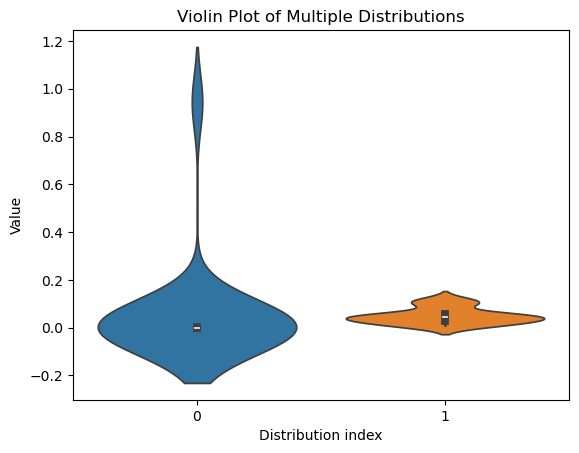

In [ ]:
A = esm_dict[5]['log_probs']
#B = esm_dict[6]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists = [
    np.array(eA)[98],
    np.array(eB)[98]
]

# Create violin plot
sns.violinplot(data=dists)

# Label axes
plt.xlabel('Distribution index')
plt.ylabel('Value')
plt.title('Violin Plot of Multiple Distributions')

plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/3451336034.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dist1 = np.array(eA)[98]
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/3451336034.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dist2 = np.array(eB)[98]


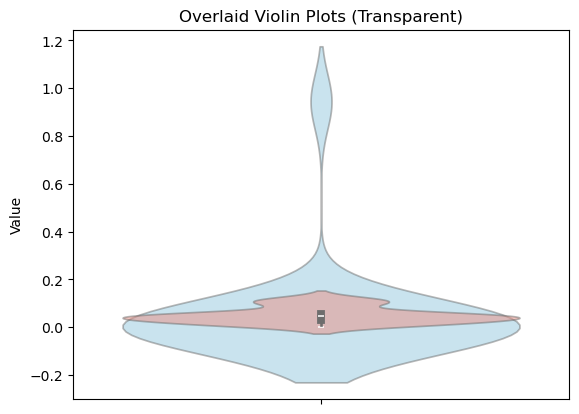

In [59]:
# Two distributions
dist1 = np.array(eA)[98]
dist2 = np.array(eB)[98]

sns.violinplot(y=dist1, color="skyblue", alpha=0.5)
sns.violinplot(y=dist2, color="salmon", alpha=0.5)

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()

In [63]:
A = esm_dict[3]['log_probs']
B = pg_dict[3]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)



/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/2506594936.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/2506594936.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


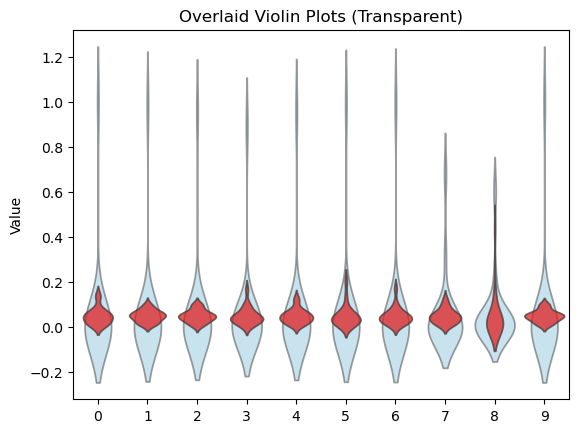

In [66]:
sns.violinplot(data=dists1[0:10], color="skyblue", alpha=0.5, inner=None)
sns.violinplot(data=dists2[0:10], color="red", alpha=0.75, inner=None)

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/2936634490.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/2936634490.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


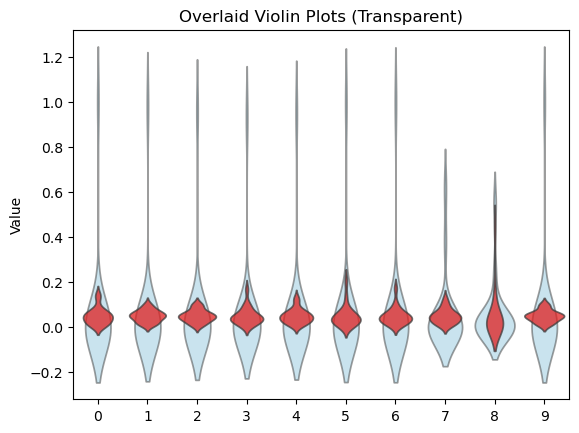

In [67]:
A = esm_dict[21]['log_probs']
B = pg_dict[21]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)

sns.violinplot(data=dists1[0:10], color="skyblue", alpha=0.5, inner=None)
sns.violinplot(data=dists2[0:10], color="red", alpha=0.75, inner=None)

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()